## Precious Enahoro - Assignment 5

In [375]:
#Importing packages
import pandas as pd
from sklearn.neighbors.kde import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math

#Importing data
data= pd.read_csv('anonymized.csv')
Feb= data[data['Date'].str.contains('Feb')] #Getting February data

For this assignment, I first started off with using all the data, but then I decided to focus on one month. This is so that it is easier to see trends in the particular month that can make it easier to detect if fraudulent activity is going on in the fictitious month we create. I chose February because it has a particular trend of increasing, then decreasing and then greatly increasing (36,58,39,62), and the number of transactions in every other year increase slightly but are around the same range -> 36 transations in Feb. 2014; 39 in Feb. 2016 and 58 in Feb. 2015 and 62 in Feb. 2017. 

Going by this trend, if we were to estimate a fictitious February 2018, we would expect that the number of transactions would be about 42-46 at the maximum. We would also later look at the dates and the amounts of the fictitious transactions to see where a forensic accountant might be able to find and determine that this was a fraudulent set of transactions.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


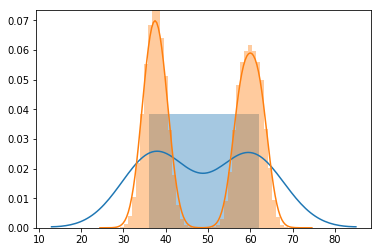

In [461]:
#Data processing for number of transactions for a single month
Feb['year'] = [i[-4:] for i in Feb['Date']]
years = Feb.groupby(['year']).count()

#Training KDE
Y = np.array(years).reshape(-1, 1)
kde_num_trans = KernelDensity(kernel='gaussian', bandwidth=2).fit(Y)

#Getting samples for plotting
num_trans_samples = kde_num_trans.sample(n_samples=100000, random_state=None)

#Plotting density models
sns.distplot(Y)
sns.distplot(num_trans_samples)

From the density model plot of the transactions, because of the small amount of data we have(which is a drawback of using this model), we can see where the modes are, which means it is less likely for the sampled number of transactions to be our estimated 42-46 transactions, going by the trend of the data. If the sampler returns a high number of estimated transactions, then the forensic accountant would be suspicious, except most of the transactions are positive. This is because that can be explained by the person getting more income sources (this might also flag something like money laundering if the sources look shady or they look like they were gotten illegitimately). However, if the number of deductions increase more than normal, then the forensic accountant would flag it as suspicious. We see the results below.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


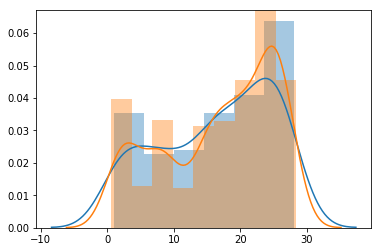

In [377]:
#Data processing for the day in the month that a transaction will occur on.
Feb['day'] = [i[:2] for i in Feb['Date']]
days = list(Feb['day'])
days= [int(days[i]) for i in range(len(days))]

#Training KDE
D = np.array(days).reshape(-1, 1)
kde_days = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(D)

#Getting samples for plotting
day_samples = kde_days.sample(n_samples=1000, random_state=None)

#Plotting density models
sns.distplot(D)
sns.distplot(day_samples)

From this density model plot, we see most of the transactions in February are done at the end of the month, and also at the beginning of the month, which seems normal, as most people receive their salaries and have to pay most bills at the beginning or end of each month. If the generated data has more transactions in the middle of the month, then it would be flagged as suspicious.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


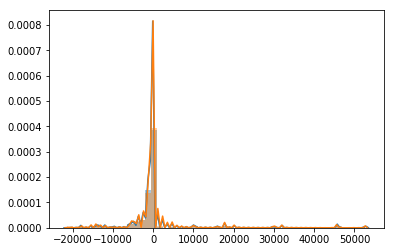

In [378]:
#Data processing for transaction size
t_size = Feb['Amount']

#Training KDE
A = np.array(t_size).reshape(-1, 1)
kde_amount = KernelDensity(kernel='gaussian', bandwidth=10).fit(A)

#Getting samples for plotting
amount_samples = kde_amount.sample(n_samples=1000, random_state=None)

#Plotting density models
sns.distplot(A)
sns.distplot(amount_samples)

We can see from this density model plot that most of the transactions would be small deductions, so the forensic accountant would be suspicious of fraud if there are very large deductions occuring in the ficititious month we create. However, if the number of transactions returned is on the high side (looking more similar to 2017), the forensic accountant would check the transactions that occured in that month against our fictitious month, and see if there are any major discrepancies or deductions that cannot be justified - a proper justification would be higher deductions because more money came in.

In [442]:
#Fictitous month

#Sample of number of transactions in the fictitious month
num_tran_single = ceil(int(kde_num_trans.sample(n_samples=1, random_state=None)))

#Samples for the days in the fictitious month that a transaction will occur on.
day_fsamples = kde_days.sample(n_samples=num_tran_single, random_state=None)
day_fsamples = [ceil(int(day_fsamples[i])) for i in range(len(day_fsamples))]

#Samples for the days in the fictitious month that a transaction will occur on.
amount_fsamples = kde_amount.sample(n_samples=num_tran_single, random_state=None)
amount_fsamples = [ceil(int(amount_fsamples[i])) for i in range(len(amount_fsamples))]

### Explain what flaws still remain in your model that a forensic accountant might be able to find and determine that this was a fraudulent set of transactions.

For this current run of this model, we get 62 transactions in February, for our fictitious February 2018. This might not seem too odd, given that February 2017 also had the same number of transactions. However, it might raise a flag if the other months (that we do not consider here) do not reflect the same increase in transactions, or it seems like a stark deviation from the usual trend. Looking closer at the dates and the amounts of the transaction for this particular run,the number of deductions seem to follow the same trend as that of February 2017, which is quite nice. 

The only thing the forensic accountant would pick up as suspicious is that a huge amount of money came into the account towards the middle of the month. For other Februaries in the past years, only small deductions happen during that time of the month. However, depending on the tracking of how the money came into the account, it can be justifiable by the person having new sources of income, or someone paying an owed debt to the individual. This might have to be backed up by maybe a huge deduction that happened sometime ago in the person's account that would show they lent someone money or they took out money to fund this new source of income, for example. Else,the huge amounts of money coming in might be a red flag of shady business going on. Another flaw of the model is that sometimes it produces a date of 0, despite my rounding up.

In [ ]:
#This code can be run to see the insights I wrote about above, but the f_samples might change if the code is re-run 
#because of the random sampling

#Original data
original=Feb[Feb['Date'].str.contains('2017')]
p = p.sort_values(by='Amount')

#Generated data
d = {'Approx_day': day_fsamples, 'Approx_amount': amount_fsamples}
df = pd.DataFrame(data=d)
df = df.sort_values(by='Approx_amount')

#Saved data - https://drive.google.com/open?id=1pIMPDJ0Bc4CNUWiVURTnxzSTO3CdYiSj

### How well does the data follow Benford's Law?

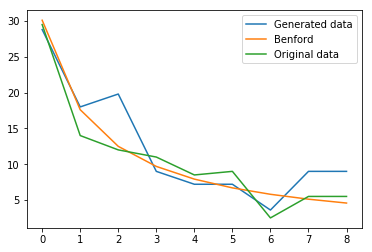

In [460]:
#Getting and formating data
g_s = [str(abs(i))for i in amount_fsamples]
g_s = [int(i[:1]) for i in g_s]
g_s= np.unique(g_s, return_counts=True)

o_d = [str(abs(i))for i in t_size]
o_d = [int(i[:1]) for i in o_d]
o_d= np.unique(o_d, return_counts=True)

#Benford's law formula
benford = [(math.log10(1 + 1 / d))*100 for d in c[0]]

#Plotting
plt.plot(g_s[1]*1.8, label= 'Generated data') #Multiplied by 2.14 to match the starting point of Benford's Law
plt.plot(benford, label = 'Benford')
plt.plot(o_d[1]/2, label= 'Original data') #Divided by 2 to match the starting point of Benford's Law
plt.legend()

The generated data does not really follow Benford's law. As seen on the graph above,there is no continuous downward trend, because it has multiple spikes. The original data does slightly better. This may be a sign of fraudulent activity in the fictitious month,but according to https://www.isaca.org/Journal/archives/2011/Volume-3/Pages/Understanding-and-Applying-Benfords-Law.aspx, it is not advisable to use Benford's law when the number of transactions is less than 1000(or 100 in some cases), and for this example, the number of transactions are less than 100. This is another weakness of this model as we cannot appropriately use Benford's law to detect fraud because of the smaller number of transactions being considered.